In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np
from scipy.stats import normaltest

Phase 1: Setting the Context (Months 1-3)

Load the dataset and calculate summary statistics using Python (pandas). Highlight key attributes and their distributions using visualizations (histograms, box plots). Identify which distributions are normal and which are skewed. Provide a detailed report of your findings.


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2016               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2017               July   
4  Resort Hotel            0         14               2016               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights meal  ...  \
0                        0                     0   BB  ...   
1                        0              

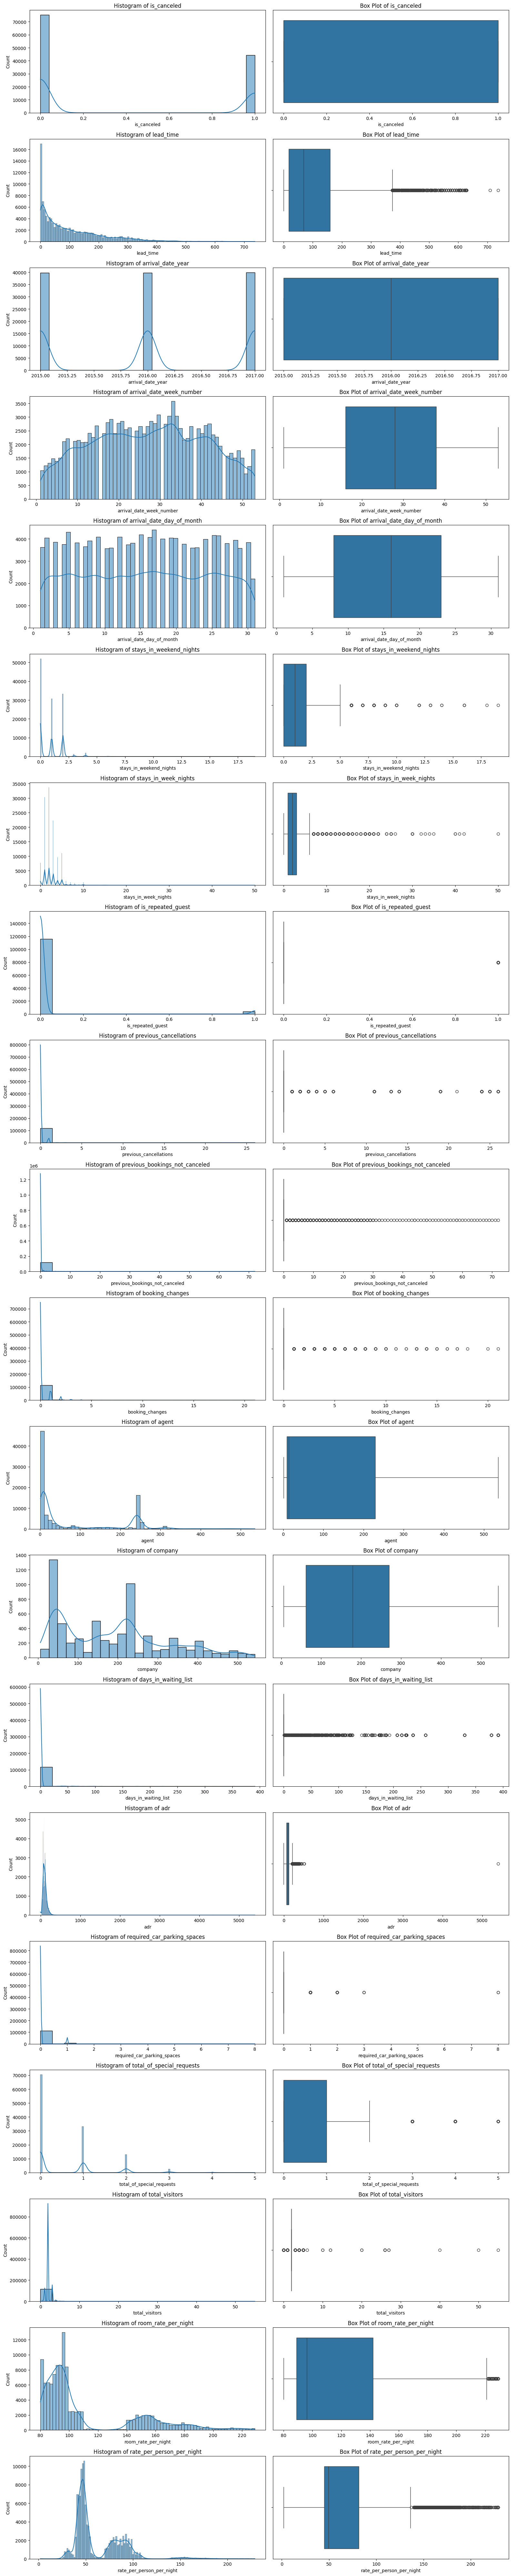

In [ ]:
#PROBLEM STATEMENT 1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'HotelBooking Datasets.csv'
df = pd.read_csv(file_path)
print(df.head())

numeric_columns = df.select_dtypes(include=['number']).columns

print(df[numeric_columns].describe())

plt.figure(figsize=(16, 4 * len(numeric_columns)))

for i, col in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 2, i * 2 + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(len(numeric_columns), 2, i * 2 + 2)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
for col in numeric_columns:
    skewness = df[col].skew()
    print(f'{col} skewness: {skewness}, {"normal" if abs(skewness) < 0.5 else "skewed"}')

is_canceled skewness: 0.5366783893964283, skewed
lead_time skewness: 1.3465498727254268, skewed
arrival_date_year skewness: -0.0018935883150745202, normal
arrival_date_week_number skewness: -0.010014326041540811, normal
arrival_date_day_of_month skewness: -0.0020004539786149557, normal
stays_in_weekend_nights skewness: 1.3800464497062852, skewed
stays_in_week_nights skewness: 2.862249242067124, skewed
is_repeated_guest skewness: 5.326315335062105, skewed
previous_cancellations skewness: 24.458048723119287, skewed
previous_bookings_not_canceled skewness: 23.53979995284346, skewed
booking_changes skewness: 6.00027005440932, skewed
agent skewness: 1.090763990820737, skewed
company skewness: 0.6008282480082909, skewed
days_in_waiting_list skewness: 11.944353446438399, skewed
adr skewness: 10.53021398218952, skewed
required_car_parking_spaces skewness: 4.163233237874088, skewed
total_of_special_requests skewness: 1.3491893774222594, skewed
total_visitors skewness: 10.15427256573051, skewed


Check for any missing values in the dataset using Python (pandas).

In [ ]:
import re

df = pd.read_csv('/content/HotelBooking Datasets.csv')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before imputation:\n", missing_values)

# Impute missing values
df['lead_time'].fillna(df['lead_time'].mean(), inplace=True)
df['adr'].fillna(df['adr'].mean(), inplace=True)
df['days_in_waiting_list'].fillna(df['days_in_waiting_list'].mean(), inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['market_segment'].fillna(df['market_segment'].mode()[0], inplace=True)
df['meal'].fillna(df['meal'].mode()[0], inplace=True)

# Impute missing values with a placeholder value
df['agent'].fillna('Unknown', inplace=True)
df['company'].fillna('Unknown', inplace=True)

# Check to ensure no missing values remain
missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)

# Function to categorize age groups
def categorize_age_group(age_group):

    # Extract numerical values
    age_numbers = re.findall(r'\d+', str(age_group))
    if not age_numbers:
        return 'Unknown'
    ages = list(map(int, age_numbers))
    if len(ages) == 1:  # Single age value
        age = ages[0]
    else:  # Age range, take the average
        age = sum(ages) / len(ages)

    if age < 18:
        return 'Children'
    elif age <= 65:
        return 'Adults'
    else:
        return 'Senior Citizens'

df['age_category'] = df['guest_age_group'].apply(categorize_age_group)

print(df[['guest_age_group', 'age_category']].head())

# Save to a new CSV file
df.to_csv('Cleaned_HotelBooking_Dataset_Updated.csv', index=False)

print("Cleaned dataset saved as 'Cleaned_HotelBooking_Dataset_Updated.csv'")

Missing values before imputation:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              21464
company                           112937
days_in_waiting_list                   0
customer_type         

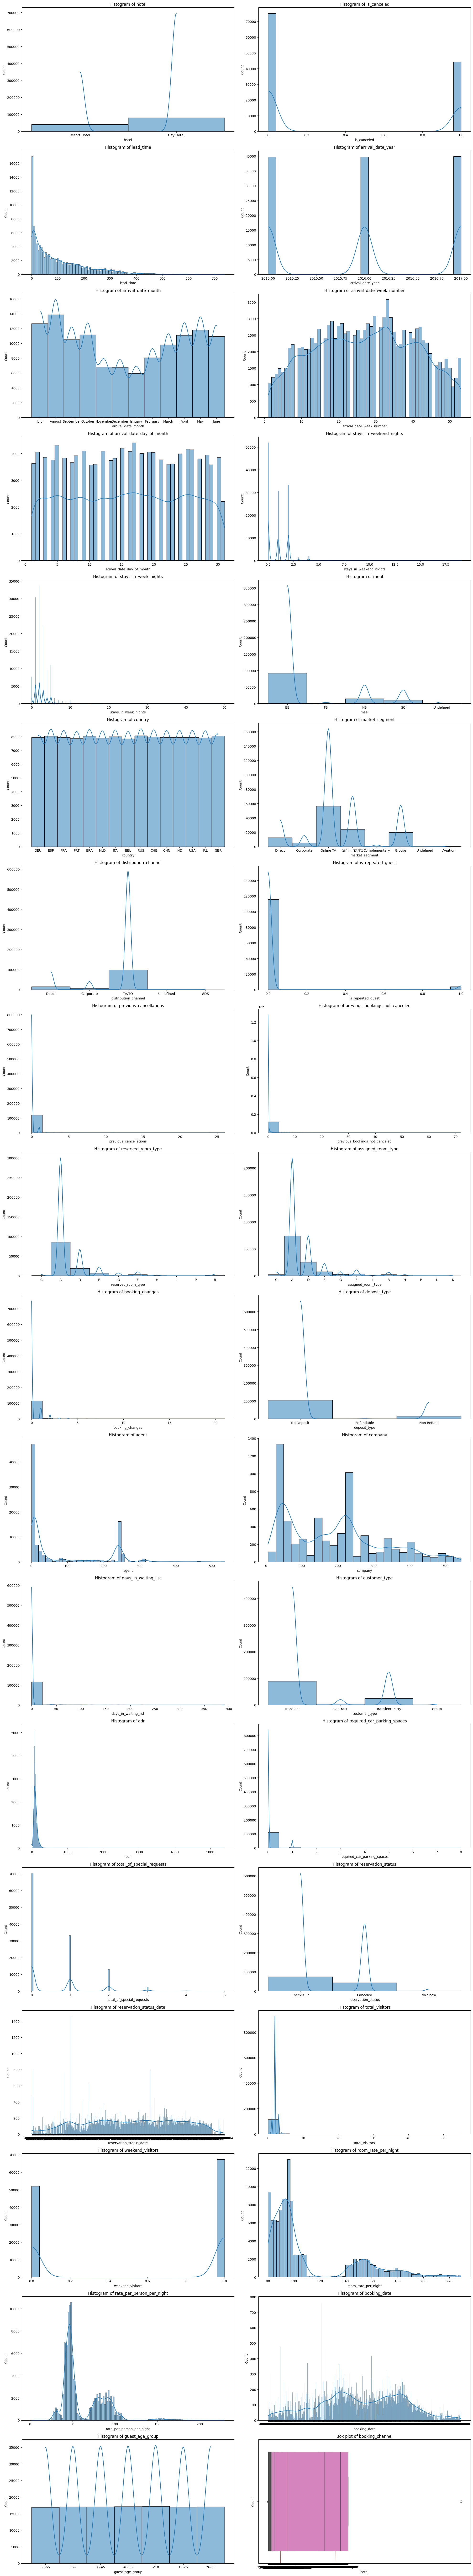

In [ ]:
key_attributes = df.columns
num_columns = len(key_attributes)
num_rows = num_columns // 2 + num_columns % 2

plt.figure(figsize=(20, 6 * num_rows))

for i, column in enumerate(key_attributes, 1):
    plt.subplot(num_rows, 2, min(i, num_rows*2))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(num_rows, 2, min(i + num_columns, num_rows*2))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

Phase 2: Data Ingestion Strategies (Months 4-5)

Conduct a comprehensive EDA on selected hotel booking attributes using Python (pandas, matplotlib, seaborn). Generate visualizations (histograms, scatter plots, box plots) to analyze key variables (e.g., stay duration, lead time, visitor types). Detect outliers using visual and statistical methods. Discuss how the insights gained from this EDA could influence business decisions. Provide a detailed report with visualizations and interpretations.

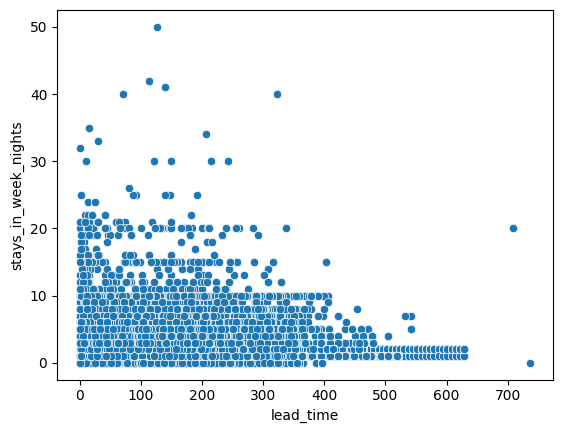

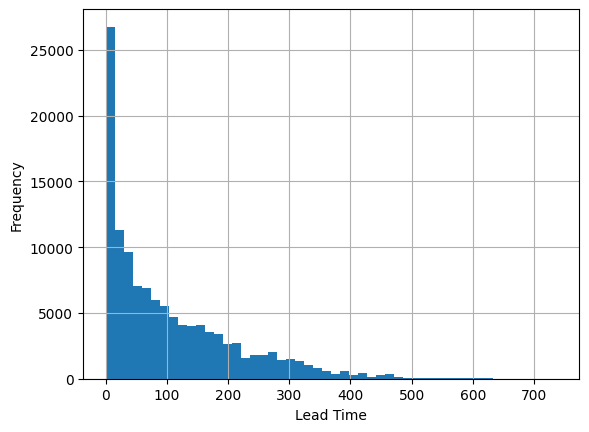

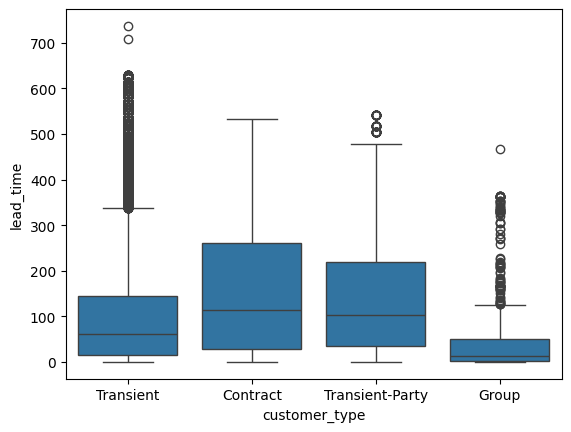

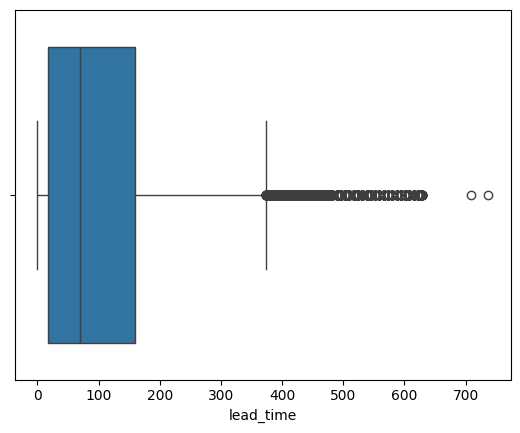

               hotel  is_canceled  lead_time  arrival_date_year  \
1       Resort Hotel            0        737               2016   
225     Resort Hotel            0        394               2015   
890     Resort Hotel            0        460               2016   
1516    Resort Hotel            0        381               2015   
1672    Resort Hotel            0        382               2015   
...              ...          ...        ...                ...   
119102    City Hotel            0        518               2016   
119107    City Hotel            0        518               2016   
119109    City Hotel            0        518               2017   
119111    City Hotel            0        518               2015   
119148    City Hotel            0        457               2015   

       arrival_date_month  arrival_date_week_number  \
1                    July                        27   
225                  July                        28   
890                August     

In [ ]:
#PROBLEM STATEMENT 3

import seaborn as sns
sns.scatterplot(x='lead_time', y='stays_in_week_nights', data=df)
plt.show()

# Histogram for lead time
df['lead_time'].hist(bins=50)
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

# Box plot for visitor types
sns.boxplot(x='customer_type', y='lead_time', data=df)
plt.show()

# Detecting outliers using box plot
sns.boxplot(x=df['lead_time'])
plt.show()

# Detecting outliers using IQR
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['lead_time'] < (Q1 - 1.5 * IQR)) | (df['lead_time'] > (Q3 + 1.5 * IQR))]
print(outliers)

Identify the countries guests are from. Calculate and visualize the percentage of total guests per country using Python (pandas, matplotlib). Highlight the top 3 countries. Round off the percentage to 2 decimal places. Provide a detailed report with visualizations.

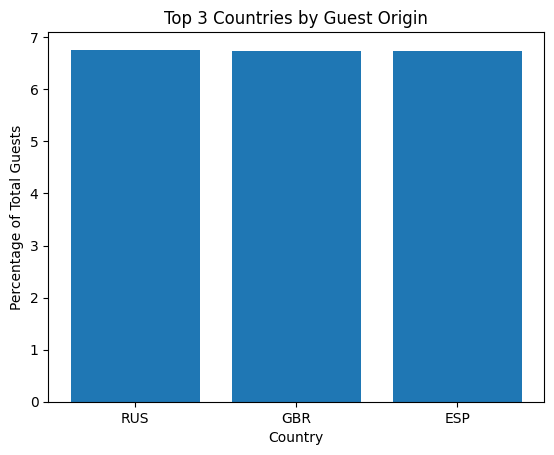

country
RUS    6.76
GBR    6.74
ESP    6.73
Name: proportion, dtype: float64


In [ ]:
#PROBLEM STATEMENT 4

df = pd.read_csv('HotelBooking Datasets.csv')

# Calculate the percentage of total guests per country
country_guests = df['country'].value_counts(normalize=True) * 100

# Round off the percentage to 2 decimal places
country_guests = country_guests.round(2)

# Visualize the top 3 countries
top_3_countries = country_guests.nlargest(3)
plt.bar(top_3_countries.index, top_3_countries.values)
plt.xlabel('Country')
plt.ylabel('Percentage of Total Guests')
plt.title('Top 3 Countries by Guest Origin')
plt.show()

# Print the top 3 countries
print(top_3_countries)

Phase 3: Data Transformation (Months 6-7)

PS 5 CODE IN SQL

Visualize the number of visitors to the hotel each month for 2015, 2016, and 2017 using line plots. Include weekend visitors and identify which year had the most weekend bookings. Use Python (matplotlib, seaborn) for visualizations. Provide a detailed report with visualizations and interpretations.

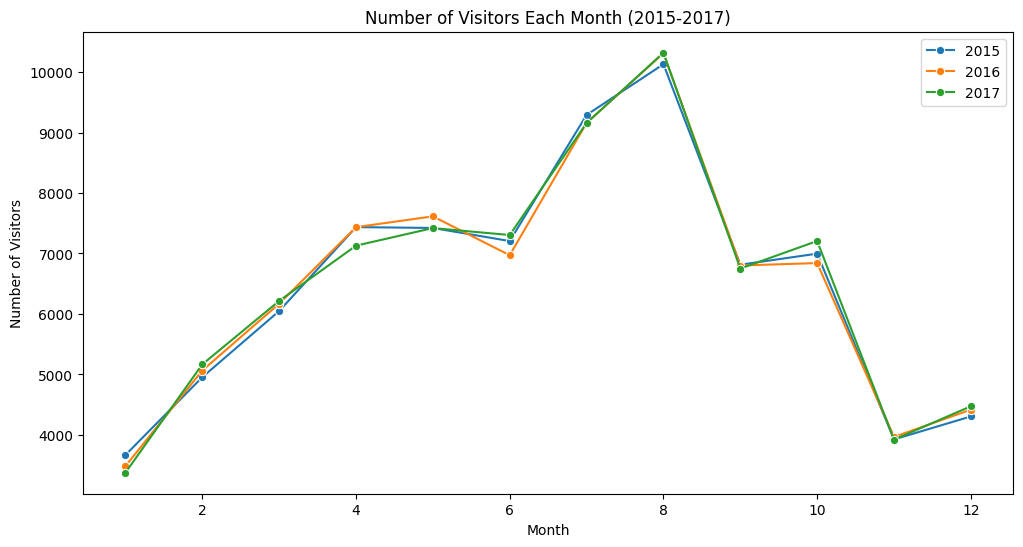

In [ ]:
#PROBLEM STATEMENT 6

df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str))

df_2015 = df[df['arrival_date'].dt.year == 2015]
df_2016 = df[df['arrival_date'].dt.year == 2016]
df_2017 = df[df['arrival_date'].dt.year == 2017]

monthly_visitors_2015 = df_2015.groupby(df_2015['arrival_date'].dt.month)[['total_visitors', 'weekend_visitors']].sum()
monthly_visitors_2016 = df_2016.groupby(df_2016['arrival_date'].dt.month)[['total_visitors', 'weekend_visitors']].sum()
monthly_visitors_2017 = df_2017.groupby(df_2017['arrival_date'].dt.month)[['total_visitors', 'weekend_visitors']].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_visitors_2015['total_visitors'], marker='o', label='2015')
sns.lineplot(data=monthly_visitors_2016['total_visitors'], marker='o', label='2016')
sns.lineplot(data=monthly_visitors_2017['total_visitors'], marker='o', label='2017')
plt.title('Number of Visitors Each Month (2015-2017)')
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.legend()
plt.show()

Phase 4: Data Warehousing (Months 8-9)

Analyze and visualize room type rates per night per person by hotel using seaborn bar plots. Perform comparative analysis of average prices paid per person per night per country. Use Python (pandas, seaborn) for analysis and visualization. Provide a detailed report with visualizations and interpretations.

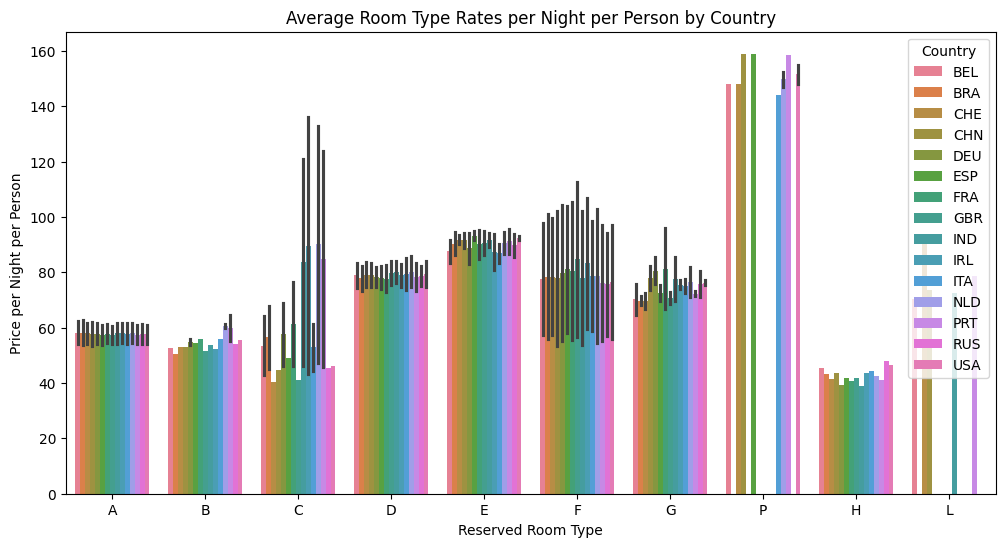

In [ ]:
#PROBLEM STATEMENT 7

room_rates = df.groupby(['hotel', 'reserved_room_type', 'country'])['rate_per_person_per_night'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=room_rates, x='reserved_room_type', y='rate_per_person_per_night', hue='country')
plt.title('Average Room Type Rates per Night per Person by Country')
plt.xlabel('Reserved Room Type')
plt.ylabel('Price per Night per Person')
plt.legend(title='Country')
plt.show()

Visualize the most booked room types across countries. Perform a countplot analysis for reserved_room_type, sorted by values, with hue set to hotel. Use Python (seaborn) for visualizations. Provide a detailed report with visualizations and interpretations.

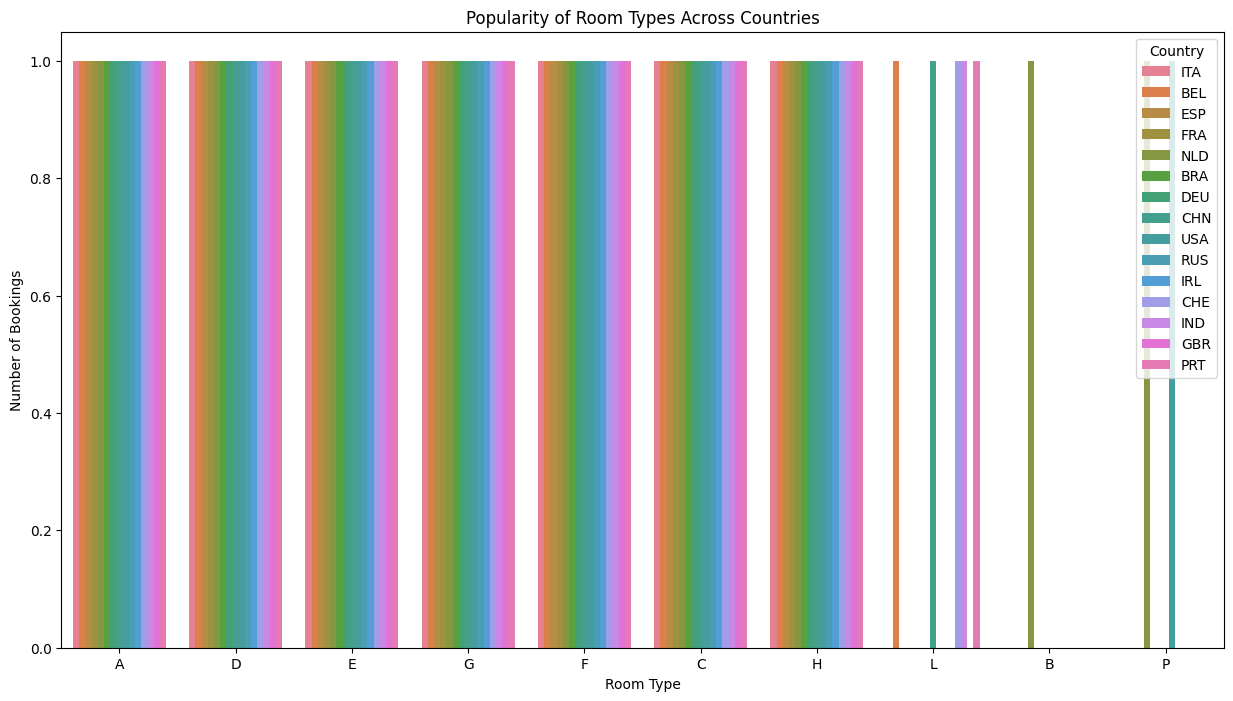

In [ ]:
#PROBLEM STATEMENT 8

df = pd.read_csv('/content/HotelBooking Datasets.csv')

# Group the data by country and room type and count the occurrences
room_type_counts = df.groupby(['country', 'reserved_room_type'])['reserved_room_type'].count().reset_index(name='counts')

# Sort DESC
room_type_counts = room_type_counts.sort_values(by=['counts'], ascending=False)

# CountPlot
plt.figure(figsize=(15, 8))
sns.countplot(x='reserved_room_type', hue='country', data=room_type_counts)
plt.title('Popularity of Room Types Across Countries')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Country')
plt.show()

Phase 5: Reporting and Visualization (Months 10-12)

Compare market segments for hotels across countries. Visualize market segments for both cancelled and successful bookings. Use Python (seaborn, matplotlib) for visualizations. Provide a detailed report with visualizations and interpretations.

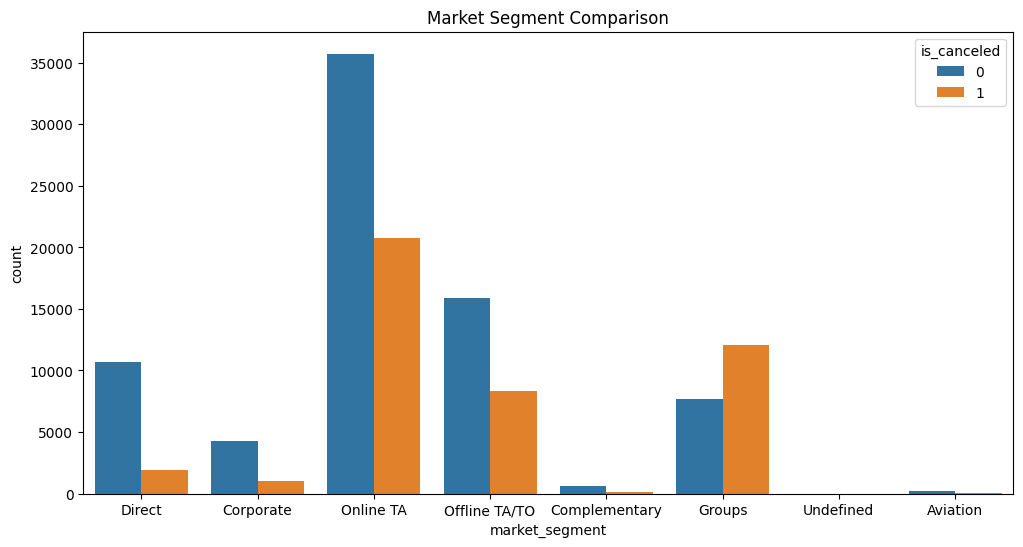

In [ ]:
#PROBLEM STATEMENT 9

df = pd.read_csv('/content/HotelBooking Datasets.csv')
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='market_segment', hue='is_canceled')
plt.title('Market Segment Comparison')
plt.show()

In [ ]:
import pandas as pd

data = pd.DataFrame({
  'lead_time': [342, 737, 7, 13, 14],
  'stays_in_week_nights': [0, 0, 1, 1, 2],
  'room_rate_per_night': [138, 145, 92, 103, 109],
  'total_visitors': [2, 2, 1, 1, 2]
})

data.head()

,lead_time,stays_in_week_nights,room_rate_per_night,total_visitors
0,342,0,138,2
1,737,0,145,2
2,7,1,92,1
3,13,1,103,1
4,14,2,109,2


Perform a heatmap correlation matrix analysis using Python (seaborn). Identify positive and negative correlations and infer their implications. Provide a detailed report with visualizations and interpretations.

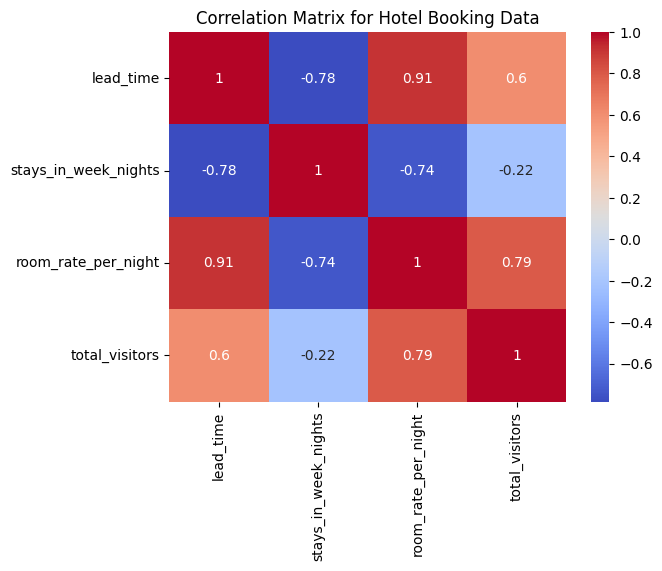

In [ ]:
#PROBLEM STATEMENT 10

correlation = data.corr()

# Heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Hotel Booking Data')
plt.show()

Analyze and visualize the percentage of adults accompanying children to hotels across countries using a pie chart. Use Python (matplotlib) for visualization. Provide a detailed report with visualizations and interpretations.

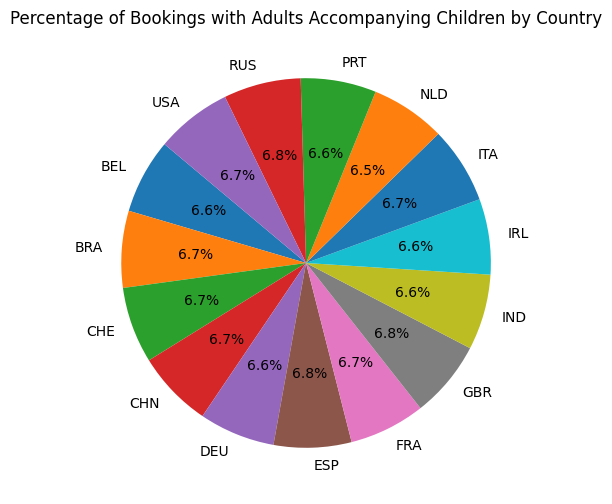

In [ ]:
#PROBLEM STATEMENT 11

df_with_children = df[df['total_visitors'] > 1]

# Group data by country and calculate the total number of bookings
bookings_by_country = df_with_children.groupby('country').size()

# Calculate the total number of bookings with adults accompanying children
total_bookings = bookings_by_country.sum()

# Calculate the percentage of bookings with adults accompanying children
percentage_bookings = (bookings_by_country / total_bookings) * 100

# Plotting the pie chart
plt.figure(figsize=(10, 6))
percentage_bookings.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Bookings with Adults Accompanying Children by Country')
plt.ylabel('')
plt.show()

Visualize booking cancellations across years and countries. Identify cancellation patterns by hotel type and market segment. Use Python (seaborn, matplotlib) for visualizations. Provide a detailed report with visualizations and interpretations.

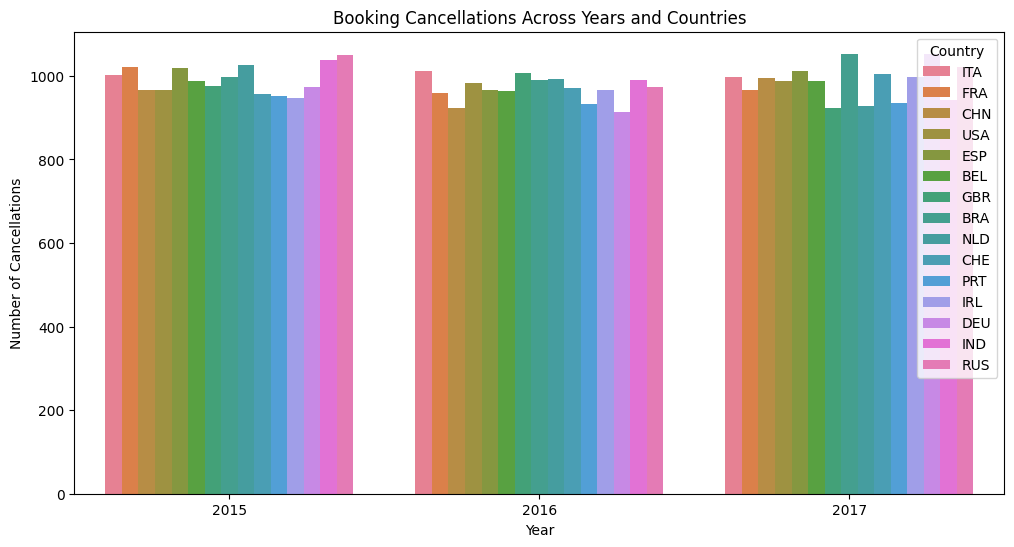

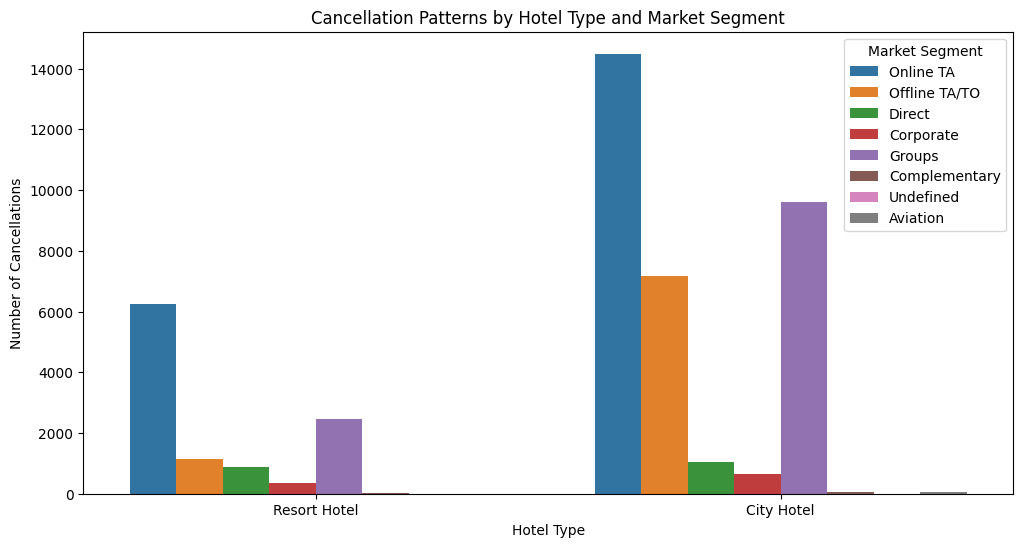

In [ ]:
#PROBLEM STATEMENT 12

df = pd.read_csv("/content/HotelBooking Datasets.csv")

# Visualize booking cancellations across years and countries
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_year', hue='country', data=df[df['is_canceled'] == 1])
plt.title('Booking Cancellations Across Years and Countries')
plt.xlabel('Year')
plt.ylabel('Number of Cancellations')
plt.legend(title='Country')
plt.show()

# Identify cancellation patterns by hotel type and market segment
plt.figure(figsize=(12, 6))
sns.countplot(x='hotel', hue='market_segment', data=df[df['is_canceled'] == 1])
plt.title('Cancellation Patterns by Hotel Type and Market Segment')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Cancellations')
plt.legend(title='Market Segment')
plt.show()

Advanced Problem Statements:

PS CODE 13 IN SQL AND POWERBI

Develop a Python script to automate the extraction of seasonal trends and booking patterns. Identify peak and off-peak seasons and discuss strategic planning and pricing strategies. Use Python libraries (pandas, matplotlib, seaborn) for analysis and visualization. Provide a detailed report with code snippets and visualizations.

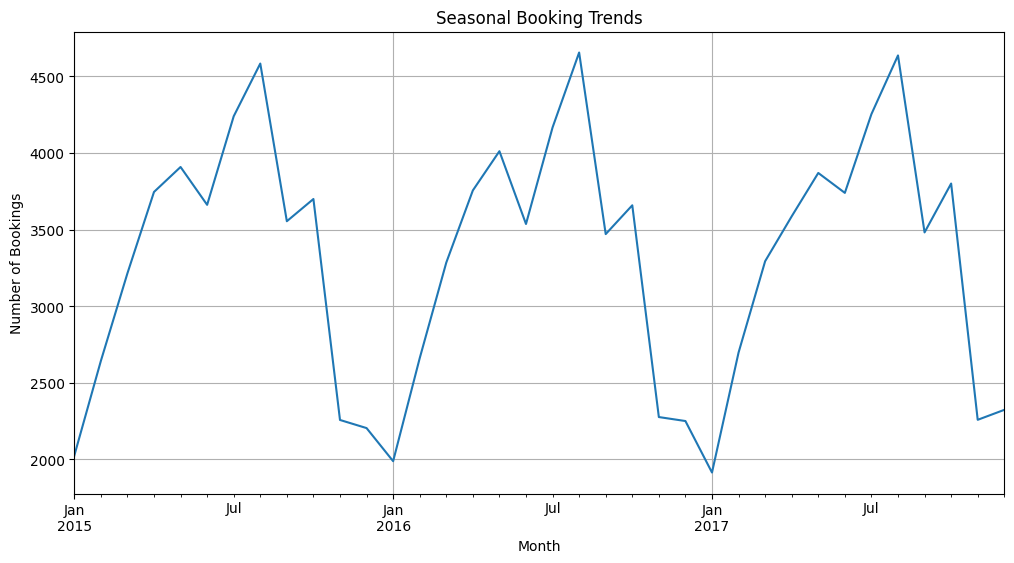

In [ ]:
#PROBLEM STATEMENT 14

df = pd.read_csv("/content/HotelBooking Datasets.csv")
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: str(x).zfill(2))
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str), errors='coerce')
df = df.dropna(subset=['arrival_date'])

seasonal_trends = df.groupby(df['arrival_date'].dt.to_period('M')).size()
seasonal_trends.index = seasonal_trends.index.to_timestamp()

plt.figure(figsize=(12, 6))
seasonal_trends.plot(kind='line')
plt.title('Seasonal Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

15. COMPREHENSIVE ANALYSIS DONE ON POWERBI
